In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import statistics
import pandas as pd
np.random.seed(69)

    "Since the industry has changed tremendously over those decades, only the information from 1990 to 2006 will be useful for this analysis. 2007 was an outlier and should be ignored." 

## import data, drop unnecessary years

In [2]:
df = pd.read_csv('drill_costs.csv')
df = df[(df['date'] >= 1990) & (df['date'] != 2007)]
df = df.reset_index(drop=True)
df['avg_dx_oil_gas_well'] = df['avg_dx_oil_gas_well'].astype(float)

In [3]:
df.head()
df.tail()

,date,oil_k,gas_k,well_k,dx_oil,dx_gas,dx_well,avg_dx_oil_gas_well
0,1990,321.8,471.3,367.5,0.1399,0.0295,0.0340,0.0678
1,1991,346.9,506.6,441.2,0.0780,0.0749,0.2005,0.1178
2,1992,362.3,426.1,357.6,0.0444,-0.1589,-0.1895,-0.1013
3,1993,356.6,521.2,387.7,-0.0157,0.2232,0.0842,0.0972
4,1994,409.5,535.1,491.5,0.1483,0.0267,0.2677,0.1476


,date,oil_k,gas_k,well_k,dx_oil,dx_gas,dx_well,avg_dx_oil_gas_well
12,2002,882.8,991.9,1673.4,0.2108,0.1064,0.0327,0.1166
13,2003,1037.3,1106.0,2065.1,0.1750,0.1150,0.2341,0.1747
14,2004,1441.8,1716.4,1977.3,0.3900,0.5519,-0.0425,0.2998
15,2005,1920.4,1497.6,2392.9,0.3319,-0.1275,0.2102,0.1382
16,2006,2238.6,1936.2,2664.6,0.1657,0.2929,0.1135,0.1907


## Asignment
***
### A recent report has come out from the U.S. Energy Information Association detailing changes in costs from 2006 to 2020 with the details here: 
- From **2006 to 2012** changes were relatively consistent in their distribution. This distribution is discussed below. 
- From **2012 to 2015** costs tended to decrease on average by 9.17% per year with a maximum of 22% and minimum of 7%. 
- From **2015 to 2019** costs tended to increase on average by 5% per year with a maximum of 6% and minimum of 2%. 
- **2020** is forecasted to follow the same increase distribution as from 2015 to 2019.   


- For **2006 to 2012:**
    - Previously the Price Analysis group has worked under the assumption that these arithmetic changes from one year to the next from 2006 to 2012 follow a Normal distribution. **Use QQ-plots or formal tests to see if you agree.**
    - The Price Analysis group would also like you to **build a kernel density estimate** of the distribution of arithmetic changes using the 48 observations described above (1990 – 2006). Use this kernel density to simulate the changes from 2006 to 2012 as well. 

### Distribution for years 1990-2006 doesn't seem normal, so it seems unlikely that for 2006-2012 will be normal.

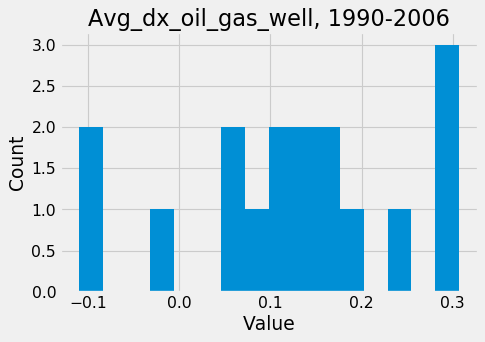

In [4]:
# visualize distribution of avg change 
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('fivethirtyeight')
#figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')

avg_dx = df['avg_dx_oil_gas_well']
avg_dx = np.array(avg_dx)

fig, ax = plt.subplots(figsize=(6, 4), dpi=80)
one_year = ax.hist(avg_dx, bins = 16);
one_year = ax.set(title = 'Avg_dx_oil_gas_well, 1990-2006',
       ylabel = 'Count',
       xlabel = 'Value')

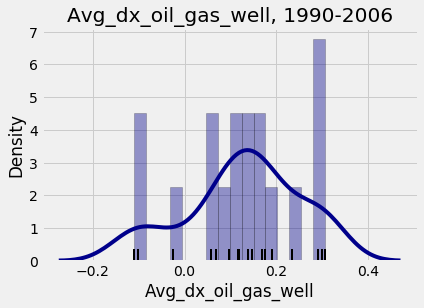

In [5]:
import sys
if 'seaborn' not in sys.modules:
    import seaborn as sns

sns.distplot(avg_dx, hist=True, kde=True, rug=True, 
             bins=16,color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             #de_kws={'linewidth': 2},
             rug_kws={'color': 'black', 'linewidth': 2}
             );

plt.title('Avg_dx_oil_gas_well, 1990-2006'); 
plt.xlabel('Avg_dx_oil_gas_well'); plt.ylabel('Density');

### Build KDE on current data

In [6]:
# function for generating kde
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

def kde_sample(x, x_grid, n, bandwidth=.02):
    """return random sample from KDE"""
    kde_skl = KernelDensity(bandwidth=bandwidth)
    kde_skl.fit(x[:, np.newaxis])
    sample = kde_skl.sample(n_samples = n, random_state = 69)
    return(sample)
    

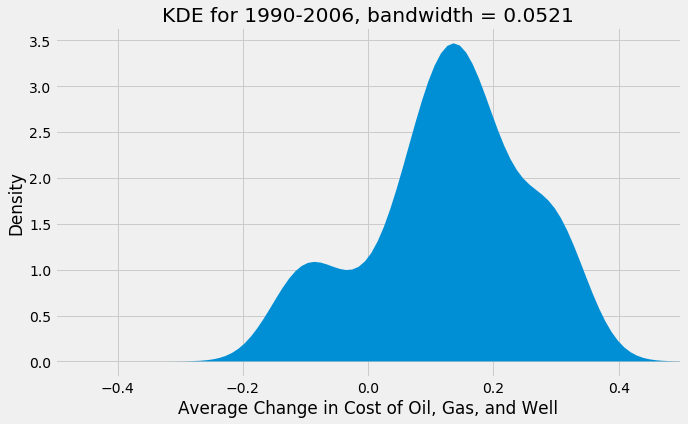

In [7]:
x_d = np.linspace(-.5, .5, 100) # x dimension 
bandwidth = .0521
kde_dist = kde_sklearn(avg_dx, x_d,bandwidth=bandwidth)
fig, ax = plt.subplots(figsize = (10, 6))
ax.fill_between(x_d, kde_dist); # fill the space between the x dimension and the density curve
ax.set_xlim(-.5, .5);
ax.set(title = 'KDE for 1990-2006, bandwidth = {}'.format(bandwidth),
       ylabel = 'Density',
       xlabel = 'Average Change in Cost of Oil, Gas, and Well');

In [8]:
# do a gridsearch to find the optimal bandwidth 
from sklearn.model_selection import GridSearchCV

bandwidths = np.linspace(0.0001, 1, 1000);
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': bandwidths});
grid.fit(avg_dx[:, None]);
print(grid.best_params_);

{'bandwidth': 0.052146846846846846}


In [9]:
# sample from the kde
kde_samp = kde_sample(avg_dx, x_d, n =1, bandwidth=bandwidth)

### Run simulations
***
Below, avgcost_t will be the average cost of oil, gas, and well for 2006.

Equation for simulations:  
      
      
- $avgcost_{t+1} = avgcost_t * (1+dx)$
  
where  
    
- $dx = (avgcost_{t+1} - avgcost_t) / avgcost_t$

#### simulation with normal distribution

In [10]:
def simulate_norm(cost_t0, mu, sigma, 
                 t_min1 = .07, t_mean1 = .0912, t_max1 = .22,
                 t_min2 = .02, t_mean2 = .05, t_max2 = .06):
    
    '''
    simulate the average cost for 2020    
        2006-2012: normal distribution
        2012-2015: triangle distribution 1
        2015-2020: triangle distribution 2
    '''
    cost_final = []
    
    for i in range(10000):
        # year == 2007
        dx = np.random.normal(mu, sigma, 1)
        cost_t = cost_t0*(1+dx)
        
        # year == [2008, 2009, 2010, 2011, 2012]
        for j in range(5):
            dx = np.random.normal(mu, sigma, 1)
            cost_t = cost_t*(1+dx)
        
        # year == [2013, 2014, 2015]
        for j in range(3):
            dx = np.random.triangular(left = t_min1, mode = t_mean1, right = t_max1) 
            cost_t = cost_t*(1+dx)
        
        # year == [2016, 2017, 2018, 2019, 2020]
        for j in range(5):
            dx = np.random.triangular(left = t_min2, mode = t_mean2, right = t_max2) 
            cost_t = cost_t*(1+dx)
            
        cost_final.append(cost_t)
        
    return(cost_final)

In [11]:
# average cost for 2006
cost_t0 = np.mean(
    df[['oil_k','gas_k', 'well_k']][df['date'] == 2006].values)

mu = np.mean(df['avg_dx_oil_gas_well'])
sigma = np.std(df['avg_dx_oil_gas_well'])

norm_values = simulate_norm(cost_t0=cost_t0, mu = mu, sigma = sigma)

#### simulation with kde

In [14]:
def simulate_kde(cost_t0, 
                t_min1 = .07, t_mean1 = .0912, t_max1 = .22,
                t_min2 = .02, t_mean2 = .05, t_max2 = .06,
                bandwidth = .0521,
                avg_dx = df['avg_dx_oil_gas_well']):
        '''
    simulate the average cost for 2020
        2006-2012: normal distribution
        2012-2015: triangle distribution 1
        2015-2020: triangle distribution 2
    '''
        # for kde sampling    
        x_d = np.linspace(-.5, .5, 100) 
        avg_dx = avg_dx 
        avg_dx = np.array(avg_dx) 

        cost_final = []
        
        for i in range(10000):
            # year == 2007
            dx = kde_sample(avg_dx, x_d, n = 1, bandwidth=bandwidth)
            cost_t = cost_t0*(1+dx)
        
            # year == [2008, 2009, 2010, 2011, 2012]
            for j in range(5):
                dx = kde_sample(avg_dx, x_d, n = 1, bandwidth=bandwidth)
                cost_t = cost_t*(1+dx)
        
            # year == [2013, 2014, 2015]
            for j in range(3):
                dx = np.random.triangular(left = t_min1, mode = t_mean1, right = t_max1) 
                cost_t = cost_t*(1+dx)
        
            # year == [2016, 2017, 2018, 2019, 2020]
            for j in range(5):
                dx = np.random.triangular(left = t_min2, mode = t_mean2, right = t_max2) 
                cost_t = cost_t*(1+dx)
            
            cost_final.append(cost_t)
        
        return(cost_final)

In [15]:
# average cost for 2006
cost_t0 = np.mean(
    df[['oil_k','gas_k', 'well_k']][df['date'] == 2006].values)

# run simulation
kde_values = simulate_kde(cost_t0 = cost_t0)

## plot distributions of average costs for 2020

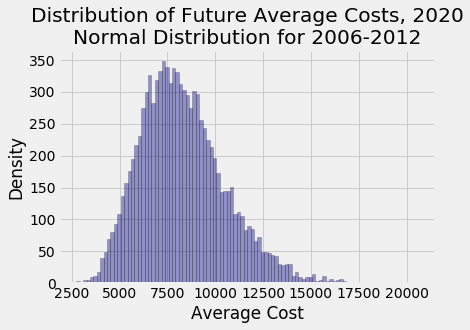

In [16]:
import sys
if 'seaborn' not in sys.modules:
    import seaborn as sns

sns.distplot(norm_values, hist=True, kde = False,
             bins=100,color = 'darkblue', 
             hist_kws={'edgecolor':'black'}
             );

plt.title('Distribution of Future Average Costs, 2020\nNormal Distribution for 2006-2012'); 
plt.xlabel('Average Cost'); plt.ylabel('Density');

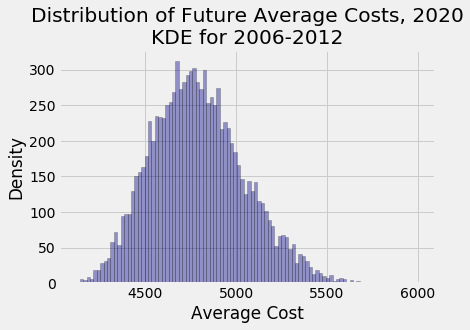

In [17]:
import sys
if 'seaborn' not in sys.modules:
    import seaborn as sns

sns.distplot(kde_values, hist=True, kde = False,
             bins=100,color = 'darkblue', 
             hist_kws={'edgecolor':'black'}
             );

plt.title('Distribution of Future Average Costs, 2020\nKDE for 2006-2012'); 
plt.xlabel('Average Cost'); plt.ylabel('Density');

## my conclusion: I think the KDE distribution is better, because it seems unreasonable to assume that the changes in average cost from years 2006-2012 will follow a normal distribution